In [1]:
import pandas as pd
import numpy as np

In [2]:
kdrama = pd.read_csv("review_individual.csv")
kdrama[kdrama['review'].isna()]
# check with website, NaN is when the review is empty, so we can drop them

,title,review
11949,Good Doctor,NaN


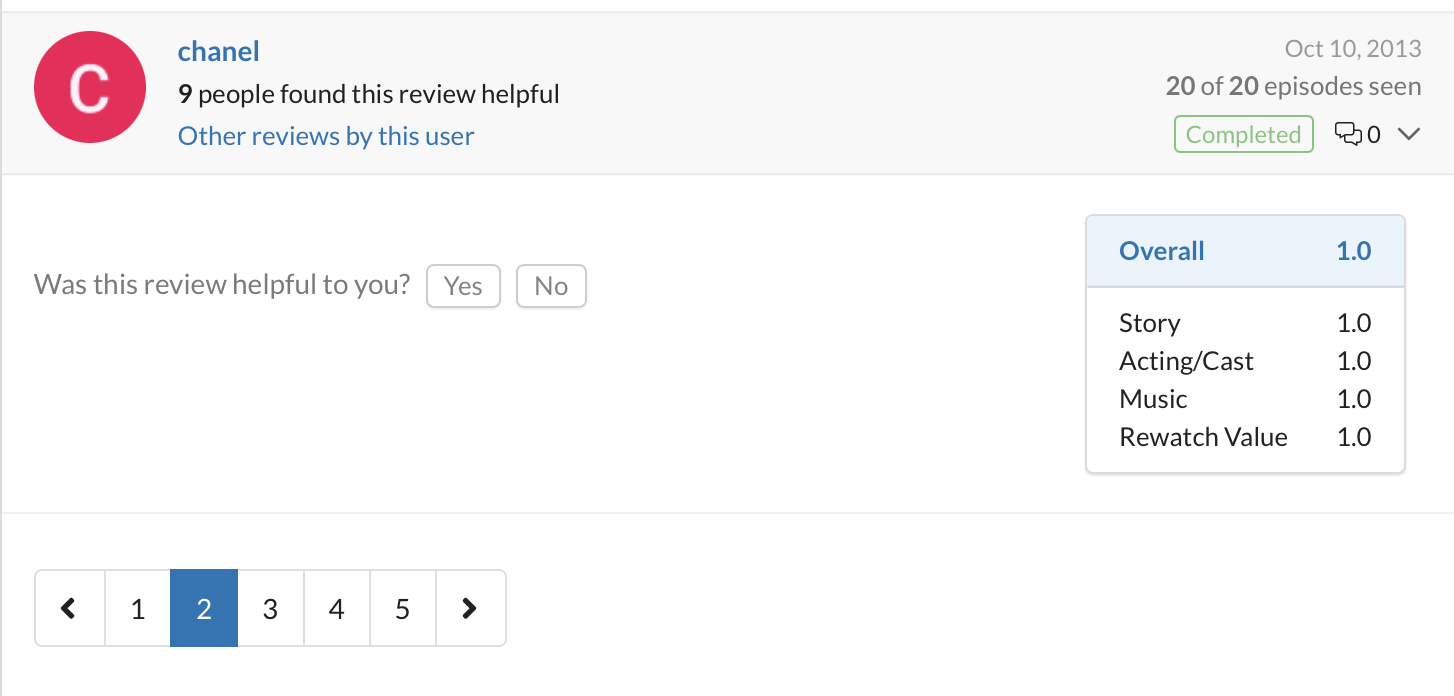

In [3]:
kdrama = kdrama.dropna().reset_index(drop=True)

In [4]:
link = pd.read_csv('url.csv', index_col = 0) # read the csv with urls which is used for scraping
print('number of links:', len(link['URL']))
print('number of unique links:', len(link['URL'].unique()))
print('number of titles:', len(link['Title'])) 
print('number of unique titles:', len(link['Title'].unique())) 
print('number of unique titles from scraping: ', len(kdrama['title'].unique()))

number of links: 1190
number of unique links: 1190
number of titles: 1190
number of unique titles: 1186
number of unique titles from scraping:  910


- there are 1190 unique links but 1186 unique titles -- some dramas have same titles (but they are different dramas becauase they have different links)
- there are 910 unique titles, the number dropped because if the drama has no reviews, it'll not appear here
- however, since some dramas have same titles, we cannot use groupby, because this will group different dramas with same name together, so we'll do a 'customized groupby' manually

- From the spider, it'll scrape all reviews for a drama then move on to the next one. So if consecutive reviews have the same title, we know they are reviews for the same drama

In [5]:
title_list = list(kdrama['title'])
dramaTitle = []
dramaCount = []
title = title_list[0]
count = 1
for t in title_list:
    if t != title:
        dramaTitle.append(title)
        dramaCount.append(count)
        count = 1
        title = t
    else:
        count += 1
dramaTitle.append(t)
dramaCount.append(count)

title_df = pd.DataFrame({'title': dramaTitle, 'count': dramaCount})
title_df.head()

,title,count
0,Goblin,299
1,Strong Woman Do Bong Soon,207
2,Descendants of the Sun,194
3,W,195
4,You Who Came from the Stars,213


In [6]:
title_df[title_df['title'].duplicated(keep=False)]

,title,count
428,Once Again,18
908,Once Again,1


- By showing dupliates, we can see two different dramas named 'Once Again'. There are also other dramas which have same titles, but some don't have reveiws so they don't appear here.


- We then drop the dramas with less than 15 reviews

In [7]:
new = title_df[title_df['count']>=15]
new

,title,count
0,Goblin,299
1,Strong Woman Do Bong Soon,207
2,Descendants of the Sun,194
3,W,195
4,You Who Came from the Stars,213
...,...,...
472,Wild Chives and Soy Bean Soup: 12 Years Reunion,21
481,The Incarnation of Money,15
482,All About My Romance,15
483,Love Affairs in the Afternoon,16


In [8]:
# new = new.reset_index(drop=True)
# new.to_csv('title.csv')

- We export this as a csv, which will keep records of all the dramas we analyzed

In [9]:
title_keep = list(new['title'])
k_new = kdrama[kdrama['title'].isin(title_keep)].reset_index(drop=True)

- we filter the reviews based on the titles we want
- the reviews of 'Once Again' need to be dropped manually

In [10]:
k_new[k_new['title']=='Once Again']

,title,review
21043,Once Again,Once Again. That's the drama name. Once Again ...
21044,Once Again,Three things you should know about me: (a) I ...
21045,Once Again,I never write reviews so bear with me but I am...
21046,Once Again,This is probably one of the best family dramas...
21047,Once Again,I've always been a fan of long family tv serie...
21048,Once Again,So….I binge-watched it for 12h straight…Do I r...
21049,Once Again,Once Again weaves a realistic tale about secon...
21050,Once Again,Here goes another drama by the writer of 'Weig...
21051,Once Again,I feel really torn as how to rate this drama b...
21052,Once Again,This is basically like 4 regular kdramas in on...


- from 21043-21060, the index are continuous so they are from one drama; we need to drop index 21233 manually

In [11]:
k_new = k_new.drop(21233).reset_index(drop = True)
k_new

,title,review
0,Goblin,"If you are hesitating to watch this at all, pl..."
1,Goblin,I feel compelled to write a review for Goblin ...
2,Goblin,It must be said that Goblin is very much a som...
3,Goblin,Every moment of it indeed shined! Goblin is a ...
4,Goblin,"Somewhere inside Goblin, buried under a mound ..."
...,...,...
21228,Queen: Love And War,I think I might have over-hyped this drama for...
21229,Queen: Love And War,"I'll just gonna say it was very wonderful, it'..."
21230,Queen: Love And War,This is one of my binge watched dramas after b...
21231,Queen: Love And War,"The best word to sum up this kdrama is ""strong..."


In [12]:
# k_new.to_csv('reviews.csv')

- After dropping it, we stores it as a new csv for further analysis